In [1]:
!pip install openpyxl matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)
n=100
dates = pd.date_range(start='2050-01-01', periods=n, freq='D')
# dates

In [4]:
# products = ['Tablet', 'Camera', 'Phone']
products = np.random.choice(['Tablet', 'Camera', 'Phone', 'Microphone', 'Keyboard'], n)
prices = np.round(np.random.uniform(50.0, 200.0, n), 2)
# prices

In [5]:
quantities = np.random.randint(1, 15, n)
# quantities

In [6]:
# products

In [7]:
data = {
    'Date': dates,
    'Product': products,
    'Price': prices,
    'Quantity': quantities
}

data

{'Date': DatetimeIndex(['2050-01-01', '2050-01-02', '2050-01-03', '2050-01-04',
                '2050-01-05', '2050-01-06', '2050-01-07', '2050-01-08',
                '2050-01-09', '2050-01-10', '2050-01-11', '2050-01-12',
                '2050-01-13', '2050-01-14', '2050-01-15', '2050-01-16',
                '2050-01-17', '2050-01-18', '2050-01-19', '2050-01-20',
                '2050-01-21', '2050-01-22', '2050-01-23', '2050-01-24',
                '2050-01-25', '2050-01-26', '2050-01-27', '2050-01-28',
                '2050-01-29', '2050-01-30', '2050-01-31', '2050-02-01',
                '2050-02-02', '2050-02-03', '2050-02-04', '2050-02-05',
                '2050-02-06', '2050-02-07', '2050-02-08', '2050-02-09',
                '2050-02-10', '2050-02-11', '2050-02-12', '2050-02-13',
                '2050-02-14', '2050-02-15', '2050-02-16', '2050-02-17',
                '2050-02-18', '2050-02-19', '2050-02-20', '2050-02-21',
                '2050-02-22', '2050-02-23', '2050-02-24'

In [8]:
df = pd.DataFrame(data)
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


In [9]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

In [10]:
df.to_csv('random_sales.csv', index=False)

In [11]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date'], date_format = '%Y-%m-%d')

In [12]:
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Tablet,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


In [13]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [14]:
df.to_excel('sales_data.xlsx')

In [15]:
df.to_json('sales_data.json')

In [16]:
df.shape

(100, 4)

In [17]:
df.describe().round(2)

,Date,Price,Quantity
count,100,100.00,100.00
mean,2050-02-19 12:00:00,117.32,7.79
min,2050-01-01 00:00:00,51.35,1.00
25%,2050-01-25 18:00:00,81.13,5.00
50%,2050-02-19 12:00:00,114.10,8.00
75%,2050-03-16 06:00:00,161.21,11.25
max,2050-04-10 00:00:00,197.26,14.00
std,NaN,42.47,4.03


In [18]:
df.values[:5]

array([[Timestamp('2050-01-01 00:00:00'), 'Microphone', 147.16, 7],
       [Timestamp('2050-01-02 00:00:00'), 'Keyboard', 103.09, 10],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 164.48, 7],
       [Timestamp('2050-01-04 00:00:00'), 'Camera', 103.48, 1],
       [Timestamp('2050-01-05 00:00:00'), 'Microphone', 162.92, 1]],
      dtype=object)

In [19]:
product_sales = df.groupby('Product')['Quantity'].sum()

In [20]:
average_prices = df.groupby('Product')['Price'].mean().round(2)
average_prices

Product
Camera        121.54
Keyboard      115.61
Microphone    129.43
Phone         123.47
Tablet        100.17
Name: Price, dtype: float64

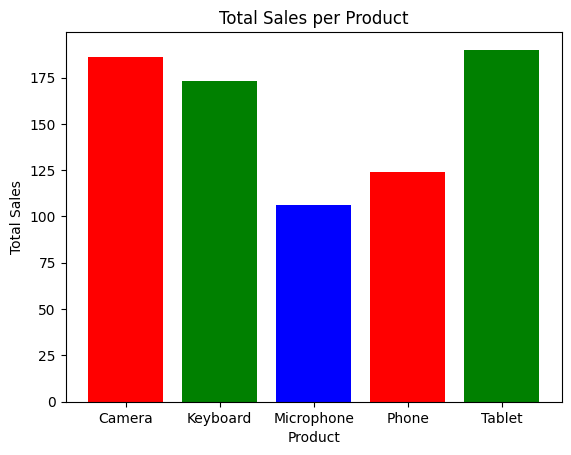

In [21]:
plt.bar(product_sales.index, product_sales.values, color = ['red', 'green', 'blue'])
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

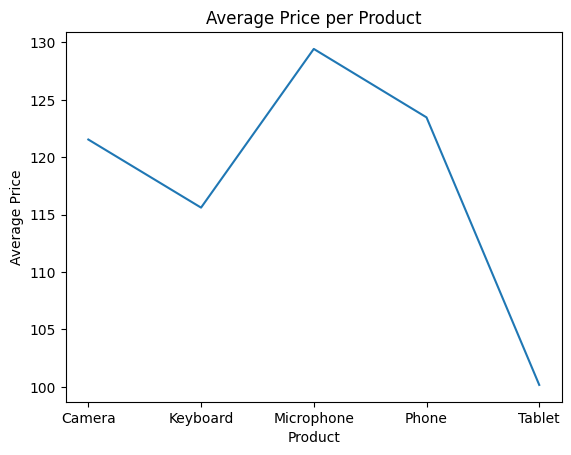

In [23]:
plt.plot(average_prices.index, average_prices.values)
plt.title('Average Price per Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.show()